In [44]:
from qiskit import *
from math import *

#----------Pour simulation noiseless---------------
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
QASM_simulator = Aer.get_backend('qasm_simulator')


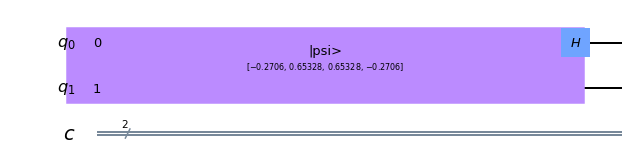

In [393]:
import math


alpha = sqrt(2)
normalisation = sqrt(2*(1+(1-alpha)*(1-alpha)))

starting_vector = [
   (1-alpha)/normalisation,
    1/normalisation,
    1/normalisation,
   (1-alpha)/normalisation]

n = 2 #number of qubit

circuit = QuantumCircuit(n, n, name="initializer_circ")
circuit.initialize(starting_vector, [0, 1])

circuit.h(0)

circuit.draw(output='mpl')

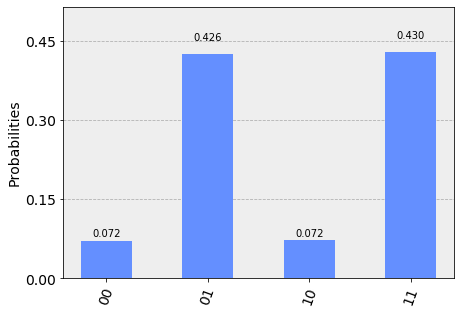

In [394]:
circuit.measure(range(n), range(n))
result = execute(circuit, backend=QASM_simulator, shots = 10000).result()
counts = result.get_counts(circuit)
plot_histogram(counts)

In [395]:
import qiskit.ignis.verification.tomography as tomo
exp_val_counts = tomo.expectation_counts(counts)
exp_vals = exp_val_counts.get('11') / exp_val_counts.get('00') 
print('Exp_value = {}'.format( exp_vals))
exp_val_counts

Exp_value = 0.003


{'00': 10000, '10': -7122, '01': -40, '11': 30}

In [396]:
A = 0
if counts.get('00'):
    A = A + counts.get('00')
if counts.get('01'):
    A = A - counts.get('01')
if counts.get('10'):
    A = A + counts.get('10')
if counts.get('11'):
    A = A - counts.get('11')
A = A / 10000
A

-0.7122

In [262]:
A =  exp_val_counts.get('10') / exp_val_counts.get('00') 
B =  exp_val_counts.get('01') / exp_val_counts.get('00') 
C =  exp_val_counts.get('11') / exp_val_counts.get('00') 

In [244]:
B = (counts.get('00')+ counts.get('01')-counts.get('10')-counts.get('11'))/10000

In [67]:
C = (counts.get('00')-counts.get('10')-counts.get('01')+counts.get('11'))/10000

In [263]:
Final = 0.5*(A+B)+C
Final

-0.7257

In [145]:
qubit_strings = [format(i, '0%sb' % 2) for
                 i in range(2 ** 2)]
print("Probabilities from simulator: ")
print([format(counts.get(s, 0) / 10000, '.3f') for
       s in qubit_strings])

Probabilities from simulator: 
['0.245', '0.251', '0.258', '0.247']


1.0